# EDA


- The os module has a perfect method to list files in a directory.
- Pandas json normalize could work here but is not necessary to convert the JSON data to a dataframe.
- You may need a nested for-loop to access each sale!
- We've put a lot of time into creating the structure of this repository, and it's a good example for future projects.  In the file functions_variables.py, there is an example function that you can import and use.  If you have any variables, functions or classes that you want to make, they can be put in the functions_variables.py file and imported into a notebook.  Note that only .py files can be imported into a notebook. If you want to import everything from a .py file, you can use the following:
```python
from functions_variables import *
```
If you just import functions_variables, then each object from the file will need to be prepended with "functions_variables"\
Using this .py file will keep your notebooks very organized and make it easier to reuse code between notebooks.

In [1]:
# (this is not an exhaustive list of libraries)
import pandas as pd
import numpy as np
import os
import json
from pprint import pprint
from functions_variables import encode_tags
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
import seaborn as sns

## Data Importing

In [ ]:
# loop over all files and put them into a dataframe

In [2]:
def JSON_formatting(JSONfile):
    '''
    Format a json file to produce a DataFrame with the specified information.

    Args:
        JSONfile (dict) : the json file with data.

    Returns:
        a DataFrame with the specified information filtered out of the larger results.
    '''
    Results = JSONfile['data']['results']

    DataFrameRows = []

    
    for result in Results:
        # setting up the rows in this dictionary.
        Row = {}
        

        
        Row['Last Update Date'] = result.get('last_update_date', None)


        Source = result.get('source', None)

        # if there's info in Source
        if Source and isinstance(Source, dict):
            # extract the values
            Row['Plan ID'] = Source.get('plan_id', None)
                
            #if 'agents' in Source:
            Agents = Source.get('agents', None)

            # if there are multiple offices listed
            if Agents and isinstance(Agents, list):
                # need to access the list
                for agent in Agents:
                    #if 'office_name' in agent:

                    OfficeNames = [agent.get('office_name') for agent in Agents if agent.get('office_name') is not None]

                    # if OfficeNames has no values I want the column to be None
                    if not OfficeNames:
                        Row['Office Name'] = None

                    else:
                        Row['Office Name'] = ', '.join(OfficeNames)
    
            # just one office listed
            else:
                #if 'office_name' in Agents:
                # just one office name value
                OfficeName = Agents.get('office_name', None)
                Row['Office Name'] = OfficeName

            
            Row['Type'] = Source.get('type', None)


        Tags = result.get('tags', None)

        # if there's info in Tags
        if Tags and isinstance(Tags, list):
            # making one column for all tags. this can be dealt with in the preprocessing for the model.
            Row['Tags'] = ', '.join(Tags)

        # if 'tags' isn't a list
        else:
            Row['Tags'] = Tags

        
        Row['Status'] = result.get('status', None)

        
        Row['List Date'] = result.get('list_date', None)
        
        
        Row['Open Houses'] = result.get('open_houses', None)
        
        
        # info from the 'description' key
        Description = result.get('description', None)

        # if there's info in 'description', extract 
        if Description and isinstance(Description, dict):

            Row['Year Built'] = Description.get('year_built', None)
            Row['Baths 3 Quarter'] = Description.get('baths_3qtr', None)
            Row['Sold Date'] = Description.get('sold_date', None)
            Row['Sold Price'] = Description.get('sold_price', None)
            Row['Baths Full'] = Description.get('baths_full', None)
            Row['Name'] = Description.get('name', None)
            Row['Baths Half'] = Description.get('baths_half', None)
            Row['Lot Square Feet'] = Description.get('lot_sqft', None)
            Row['Square Feet'] = Description.get('sqft', None)
            Row['Baths'] = Description.get('baths', None)
            Row['Sub Type'] = Description.get('sub_type', None)
            Row['Baths 1 Quarter'] = Description.get('baths_1qtr', None)
            Row['Garage'] = Description.get('garage', None)
            Row['Stories'] = Description.get('stories', None)
            Row['Beds'] = Description.get('beds', None)
            Row['House Type'] = Description.get('type', None)

        
        # info from the 'branding' key
        Branding = result.get('branding', None)

        # if there's info in 'branding', extract 
        if Branding and isinstance(Branding, list):
            for ele in Branding:
                Row['Company Name'] = ele.get('name', None)
                Row['Branding Type'] = ele.get('type', None)
                
                    
                    
        Row['List Price'] = result.get('list_price', None)

        # info from the 'lead_attributes' key
        LeadAttributes = result.get('lead_attributes', None)

        
        Row['Show Contact an Agent'] = LeadAttributes.get('show_contact_an_agent', None)


        # info from the 'property_id' key
        Row['Property ID'] = result.get('property_id', None)

        # info from the 'photos' key
        Photos = result.get('photos', None)

        # if there's info in 'photos', extract 
        if Photos and isinstance(Photos, list):
            for photo in Photos:
                PhotoTags = photo.get('tags', None)
                # if there's info in 'tags', extract 
                if PhotoTags and isinstance(PhotoTags, list):
                    for tag in PhotoTags:
                        Row['Photo Label'] = tag.get('label', None)
                        Row['Photo Probability'] = tag.get('probability', None)

                Row['Photo Link'] = photo.get('href', None)


        # info from the 'flags' key
        Flags = result.get('flags', None)

        # if there's info in 'flags', extract 
        if Flags and isinstance(Flags, dict):
            Row['Is New Construction'] = Flags.get('is_new_construction', None)
            Row['Is For Rent'] = Flags.get('is_for_rent', None)
            Row['Is Subdivision'] = Flags.get('is_subdivision', None)
            Row['Is Contingent'] = Flags.get('is_contingent', None)
            Row['Is Price Reduced'] = Flags.get('is_price_reduced', None)
            Row['Is Pending'] = Flags.get('is_pending', None)
            Row['Is Foreclosure'] = Flags.get('is_foreclosure', None)
            Row['Is Plan'] = Flags.get('is_plan', None)
            Row['Is Coming Soon'] = Flags.get('is_coming_soon', None)
            Row['Is New Construction'] = Flags.get('is_new_construction', None)
            Row['Is New Listing'] = Flags.get('is_new_listing', None)

        Row['Community'] = result.get('community', None)

        # info from the 'products' key
        Products = result.get('products', None)

        # if there's info in 'products', extract 
        if Products and isinstance(Products, dict):
            Row['Brand Category'] = Products.get('brand_name', None)

        # info from the 'virtual_tours' key
        VirtualTour = result.get('virtual_tours', None)

        # if there's info in 'virtual_tours', extract 
        if VirtualTour and isinstance(VirtualTour, list):
            # need to access the list
            for tour in VirtualTour:
                # get tour type
                Row['Tour Type'] = tour.get('type', None)

                # get tour link
                Row['Tour Link'] = tour.get('href', None)

        # info from 'other_listings' key
        OtherListings = result.get('other_listings', None)
        
        # if there's info in 'other_listings', extract 
        if OtherListings and isinstance(OtherListings, dict):

            # info from 'rdc' key
            RDC = OtherListings.get('rdc', None)
                # if there's info in 'rdc', extract 
            if RDC and isinstance(RDC, list):
                # accessing the list
                for listing in RDC:
                    Row['Other Listing ID'] = listing.get('listing_id', None)
                    Row['Other Listing Key'] = listing.get('listing_key', None)
                    Row['Other Listing Status'] = listing.get('status', None)
                    Row['Other Listing Primary'] = listing.get('primary', None)

        Row['Listing ID'] = result.get('listing_id', None)

        Row['Price Reduced'] = result.get('price_reduced_amount', None)

        # get the location key information
        Location = result.get('location', None)

        # if there's info in 'location', extract 
        if Location and isinstance(Location, dict):
            # address info
            Address = Location.get('address', None)

            # if there's info in 'address', extract 
            if Address and isinstance(Address, dict):
                Row['Postal Code'] = Address.get('postal_code', None)
                Row['State'] = Address.get('state', None)

                # coordinate info
                Coordinate = Address.get('coordinate', None)
                
                # if there's info in 'coordinate', extract 
                if Coordinate and isinstance(Coordinate, dict):
                    Row['Latitude'] = Coordinate.get('lat', None)
                    Row['Longitude'] = Coordinate.get('lon', None)
                    Row['City'] = Address.get('city', None)
                    Row['StateCode'] = Address.get('state_code', None)
                    Row['Line'] = Address.get('line', None)
        
        Row['Matterport'] = result.get('matterport', None)


        
        DataFrameRows.append(Row)

    ParsedDataFrame = pd.DataFrame(DataFrameRows)
    return ParsedDataFrame


In [9]:
DataPath = '../data/'
DataDirectory = os.fsencode(DataPath)

# a list to hold all the DataFrames
AllDataFrames = []

for file in os.listdir(DataDirectory):
    FileName = os.fsdecode(file)
    # ignoring the .gitkeep file
    if FileName.endswith('.json'):
        FilePath = os.path.join(DataPath, FileName)
        with open(FilePath) as JSONfile:
            jsonFile = json.load(JSONfile)
            DataFrame = JSON_formatting(jsonFile)
            AllDataFrames.append(DataFrame)
            
            

        #FileTest = '../data/AK_Juneau_0.json'
        


        #DataFrame = JSON_formatting(FilePath)
        #AllDataFrames.append(DataFrame)
FinalDataFrame = pd.concat(AllDataFrames, ignore_index=True)

C:\Users\mhahm_000\AppData\Local\Temp\ipykernel_37556\2296384253.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  FinalDataFrame = pd.concat(AllDataFrames, ignore_index=True)


In [10]:
FinalDataFrame

,Last Update Date,Plan ID,Office Name,Type,Tags,Status,List Date,Open Houses,Year Built,Baths 3 Quarter,...,Postal Code,State,Latitude,Longitude,City,StateCode,Line,Matterport,Tour Type,Tour Link
0,2023-09-19T20:52:50Z,NaN,"EXP Realty LLC - Southeast Alaska, Non-Member ...",mls,"carport, community_outdoor_space, cul_de_sac, ...",sold,2023-06-29T21:16:25.000000Z,None,1963.0,NaN,...,99801,Alaska,58.363950,-134.593720,Juneau,AK,9453 Herbert Pl,False,NaN,NaN
1,None,NaN,NaN,NaN,None,sold,None,None,NaN,NaN,...,99801,Alaska,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
2,None,NaN,NaN,NaN,None,sold,None,None,NaN,NaN,...,99801,Alaska,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
3,None,NaN,NaN,NaN,None,sold,None,None,NaN,NaN,...,99801,Alaska,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
4,None,NaN,NaN,NaN,None,sold,None,None,NaN,NaN,...,99801,Alaska,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8154,2023-07-28T17:00:12Z,None,None,mls,"central_air, forced_air, basement, two_or_more...",sold,2023-04-05T19:28:04Z,None,1910.0,NaN,...,25314,West Virginia,38.341576,-81.644994,Charleston,WV,1008 Oakmont Rd,False,NaN,NaN
8155,2023-07-28T17:10:21Z,None,Joe R. Pyle Complete Auction and Realty Servic...,mls,"basement, big_lot",sold,2023-05-28T02:25:28Z,None,NaN,NaN,...,25387,West Virginia,38.377371,-81.661662,Charleston,WV,1041 Temple St,False,NaN,NaN
8156,2023-07-25T13:00:22Z,None,None,mls,"basement, big_lot",sold,2023-01-24T18:27:46Z,None,NaN,NaN,...,25314,West Virginia,38.338617,-81.659885,Charleston,WV,238 Oakwood Rd,False,NaN,NaN
8157,2023-07-28T16:37:19Z,None,None,mls,rental_property,sold,2023-03-24T12:27:42Z,None,NaN,NaN,...,25302,West Virginia,38.363038,-81.644214,Charleston,WV,408 Lee St W,False,NaN,NaN


## Data Cleaning and Wrangling

At this point, ensure that you have all sales in a dataframe.
- Take a quick look at your data (i.e. `.info()`, `.describe()`) - what do you see?
- Is each cell one value, or do some cells have lists?
- What are the data types of each column?
- Some sales may not actually include the sale price (target).  These rows should be dropped.
- There are a lot of NA/None values.  Should these be dropped or replaced with something?
    - You can drop rows or use various methods to fills NA's - use your best judgement for each column 
    - i.e. for some columns (like Garage), NA probably just means no Garage, so 0
- Drop columns that aren't needed
    - Don't keep the list price because it will be too close to the sale price. Assume we want to predict the price of houses not yet listed

In [ ]:
# load and concatenate data here
# drop or replace values as necessary

In [15]:
# remove duplicates
FinalDataFrame.duplicated().value_counts()

True     6364
False    1795
Name: count, dtype: int64

In [16]:
DroppedDuplicates = FinalDataFrame.drop_duplicates()
DroppedDuplicates

,Last Update Date,Plan ID,Office Name,Type,Tags,Status,List Date,Open Houses,Year Built,Baths 3 Quarter,...,Postal Code,State,Latitude,Longitude,City,StateCode,Line,Matterport,Tour Type,Tour Link
0,2023-09-19T20:52:50Z,NaN,"EXP Realty LLC - Southeast Alaska, Non-Member ...",mls,"carport, community_outdoor_space, cul_de_sac, ...",sold,2023-06-29T21:16:25.000000Z,NaN,1963.0,NaN,...,99801,Alaska,58.363950,-134.593720,Juneau,AK,9453 Herbert Pl,False,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,sold,NaN,NaN,NaN,NaN,...,99801,Alaska,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,sold,NaN,NaN,NaN,NaN,...,99801,Alaska,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,sold,NaN,NaN,NaN,NaN,...,99801,Alaska,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,sold,NaN,NaN,NaN,NaN,...,99801,Alaska,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7993,2023-07-28T17:00:12Z,NaN,NaN,mls,"central_air, forced_air, basement, two_or_more...",sold,2023-04-05T19:28:04Z,NaN,1910.0,NaN,...,25314,West Virginia,38.341576,-81.644994,Charleston,WV,1008 Oakmont Rd,False,NaN,NaN
7994,2023-07-28T17:10:21Z,NaN,Joe R. Pyle Complete Auction and Realty Servic...,mls,"basement, big_lot",sold,2023-05-28T02:25:28Z,NaN,NaN,NaN,...,25387,West Virginia,38.377371,-81.661662,Charleston,WV,1041 Temple St,False,NaN,NaN
7995,2023-07-25T13:00:22Z,NaN,NaN,mls,"basement, big_lot",sold,2023-01-24T18:27:46Z,NaN,NaN,NaN,...,25314,West Virginia,38.338617,-81.659885,Charleston,WV,238 Oakwood Rd,False,NaN,NaN
7996,2023-07-28T16:37:19Z,NaN,NaN,mls,rental_property,sold,2023-03-24T12:27:42Z,NaN,NaN,NaN,...,25302,West Virginia,38.363038,-81.644214,Charleston,WV,408 Lee St W,False,NaN,NaN


In [17]:
# remove same sell date and Listing ID
RemovedDuplicateListings = DroppedDuplicates.drop_duplicates(subset=['Sold Date','Listing ID'])
RemovedDuplicateListings

,Last Update Date,Plan ID,Office Name,Type,Tags,Status,List Date,Open Houses,Year Built,Baths 3 Quarter,...,Postal Code,State,Latitude,Longitude,City,StateCode,Line,Matterport,Tour Type,Tour Link
0,2023-09-19T20:52:50Z,NaN,"EXP Realty LLC - Southeast Alaska, Non-Member ...",mls,"carport, community_outdoor_space, cul_de_sac, ...",sold,2023-06-29T21:16:25.000000Z,NaN,1963.0,NaN,...,99801,Alaska,58.363950,-134.593720,Juneau,AK,9453 Herbert Pl,False,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,sold,NaN,NaN,NaN,NaN,...,99801,Alaska,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,sold,NaN,NaN,NaN,NaN,...,99801,Alaska,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
5,2023-08-04T22:49:14Z,NaN,"Platinum Keller Williams Realty Alaska Group, ...",mls,"carport, hill_or_mountain_view, ocean_view, si...",sold,2023-08-21T21:01:22.000000Z,NaN,1969.0,NaN,...,99801,Alaska,58.386651,-134.649067,Juneau,AK,11909 Glacier Hwy Apt 105,False,NaN,NaN
6,2023-08-04T21:31:44Z,NaN,"Southeast Alaska Real Estate, Platinum Keller ...",mls,"city_view, community_outdoor_space, community_...",sold,2023-08-21T21:01:22.000000Z,NaN,1920.0,NaN,...,99801,Alaska,58.304573,-134.403991,Juneau,AK,808 5th St,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7993,2023-07-28T17:00:12Z,NaN,NaN,mls,"central_air, forced_air, basement, two_or_more...",sold,2023-04-05T19:28:04Z,NaN,1910.0,NaN,...,25314,West Virginia,38.341576,-81.644994,Charleston,WV,1008 Oakmont Rd,False,NaN,NaN
7994,2023-07-28T17:10:21Z,NaN,Joe R. Pyle Complete Auction and Realty Servic...,mls,"basement, big_lot",sold,2023-05-28T02:25:28Z,NaN,NaN,NaN,...,25387,West Virginia,38.377371,-81.661662,Charleston,WV,1041 Temple St,False,NaN,NaN
7995,2023-07-25T13:00:22Z,NaN,NaN,mls,"basement, big_lot",sold,2023-01-24T18:27:46Z,NaN,NaN,NaN,...,25314,West Virginia,38.338617,-81.659885,Charleston,WV,238 Oakwood Rd,False,NaN,NaN
7996,2023-07-28T16:37:19Z,NaN,NaN,mls,rental_property,sold,2023-03-24T12:27:42Z,NaN,NaN,NaN,...,25302,West Virginia,38.363038,-81.644214,Charleston,WV,408 Lee St W,False,NaN,NaN


In [18]:
RemovedDuplicateListings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1753 entries, 0 to 8038
Data columns (total 60 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Last Update Date       1748 non-null   object 
 1   Plan ID                1 non-null      float64
 2   Office Name            488 non-null    object 
 3   Type                   1704 non-null   object 
 4   Tags                   1679 non-null   object 
 5   Status                 1753 non-null   object 
 6   List Date              1704 non-null   object 
 7   Open Houses            0 non-null      float64
 8   Year Built             1596 non-null   float64
 9   Baths 3 Quarter        125 non-null    float64
 10  Sold Date              1753 non-null   object 
 11  Sold Price             1442 non-null   float64
 12  Baths Full             1595 non-null   float64
 13  Name                   0 non-null      float64
 14  Baths Half             500 non-null    float64
 15  Lot Squar

In [19]:
RemovedDuplicateListings.describe()

,Plan ID,Open Houses,Year Built,Baths 3 Quarter,Sold Price,Baths Full,Name,Baths Half,Lot Square Feet,Square Feet,...,Is Plan,Is Coming Soon,Other Listing ID,Other Listing Key,Listing ID,Price Reduced,Postal Code,Latitude,Longitude,Tour Type
count,1.000000e+00,0.0,1596.000000,125.000000,1.442000e+03,1595.000000,0.0,500.000000,1.516000e+03,1596.000000,...,0.0,0.0,1.708000e+03,0.0,1.704000e+03,5.470000e+02,1753.000000,1707.000000,1707.000000,0.0
mean,4.170007e+11,NaN,1968.845865,1.256000,4.196540e+05,1.885266,NaN,1.104000,2.396766e+05,1927.270677,...,NaN,NaN,1.930787e+09,NaN,2.956128e+09,2.629867e+04,50997.311466,39.006104,-92.369762,NaN
std,NaN,NaN,35.323743,0.473559,8.662390e+05,0.859665,NaN,0.411732,5.597690e+06,1305.492824,...,NaN,NaN,1.171101e+09,NaN,9.834527e+07,9.532929e+04,29555.804491,4.450931,16.159843,NaN
min,4.170007e+11,NaN,1828.000000,1.000000,3.080000e+02,1.000000,NaN,1.000000,0.000000e+00,120.000000,...,NaN,NaN,5.002429e+08,NaN,6.052327e+08,1.000000e+02,2111.000000,21.277707,-157.810583,NaN
25%,4.170007e+11,NaN,1950.000000,1.000000,1.950000e+05,1.000000,NaN,1.000000,4.854750e+03,1252.000000,...,NaN,NaN,5.820983e+08,NaN,2.959507e+09,6.000000e+03,25311.000000,35.664397,-104.996970,NaN
50%,4.170007e+11,NaN,1975.000000,1.000000,3.120000e+05,2.000000,NaN,1.000000,7.841000e+03,1635.000000,...,NaN,NaN,2.931945e+09,NaN,2.960861e+09,1.010000e+04,50311.000000,39.690714,-89.347261,NaN
75%,4.170007e+11,NaN,1997.000000,1.000000,4.697500e+05,2.000000,NaN,1.000000,1.263200e+04,2251.500000,...,NaN,NaN,2.960306e+09,NaN,2.961819e+09,2.027800e+04,78747.000000,41.837577,-78.584928,NaN
max,4.170007e+11,NaN,2024.000000,3.000000,2.706500e+07,8.000000,NaN,5.000000,1.676624e+08,32106.000000,...,NaN,NaN,2.963228e+09,NaN,2.963230e+09,2.015999e+06,99801.000000,58.396178,-71.006343,NaN


In [20]:
RemovedDuplicateListings.columns

Index(['Last Update Date', 'Plan ID', 'Office Name', 'Type', 'Tags', 'Status',
       'List Date', 'Open Houses', 'Year Built', 'Baths 3 Quarter',
       'Sold Date', 'Sold Price', 'Baths Full', 'Name', 'Baths Half',
       'Lot Square Feet', 'Square Feet', 'Baths', 'Sub Type',
       'Baths 1 Quarter', 'Garage', 'Stories', 'Beds', 'House Type',
       'Company Name', 'Branding Type', 'List Price', 'Show Contact an Agent',
       'Property ID', 'Photo Label', 'Photo Probability', 'Photo Link',
       'Is New Construction', 'Is For Rent', 'Is Subdivision', 'Is Contingent',
       'Is Price Reduced', 'Is Pending', 'Is Foreclosure', 'Is Plan',
       'Is Coming Soon', 'Is New Listing', 'Community', 'Brand Category',
       'Other Listing ID', 'Other Listing Key', 'Other Listing Status',
       'Other Listing Primary', 'Listing ID', 'Price Reduced', 'Postal Code',
       'State', 'Latitude', 'Longitude', 'City', 'StateCode', 'Line',
       'Matterport', 'Tour Type', 'Tour Link'],
      dty

In [21]:
# we want every row to have the actual sale price as it's what we're trying to predict.
SoldPriceExists = RemovedDuplicateListings.dropna(subset=['Sold Price'])
SoldPriceExists

,Last Update Date,Plan ID,Office Name,Type,Tags,Status,List Date,Open Houses,Year Built,Baths 3 Quarter,...,Postal Code,State,Latitude,Longitude,City,StateCode,Line,Matterport,Tour Type,Tour Link
30,2021-04-13T17:14:34Z,NaN,Forrest Meadows Homes & Land,mls,"central_air, central_heat, community_outdoor_s...",sold,2023-12-19T18:08:22.000000Z,NaN,1998.0,NaN,...,36117,Alabama,32.389075,-86.178412,Montgomery,AL,501 Moorfield Ln,False,NaN,NaN
31,2024-01-16T16:07:56Z,NaN,Wallace & Moody Realty,mls,"city_view, hardwood_floors, two_or_more_storie...",sold,2023-11-10T14:20:36.000000Z,NaN,1945.0,NaN,...,36107,Alabama,32.382748,-86.273286,Montgomery,AL,2326 Winona Ave,False,NaN,NaN
32,2021-04-13T17:14:32Z,NaN,FlatFee.com,mls,"carport, central_air, central_heat, dishwasher...",sold,2023-12-19T18:08:22.000000Z,NaN,1969.0,NaN,...,36109,Alabama,32.380023,-86.221454,Montgomery,AL,115 Lookout Ridge Rd,False,NaN,NaN
33,2024-01-16T16:05:10Z,NaN,Wallace & Moody Realty,mls,"carport, central_air, city_view, community_out...",sold,2023-07-05T16:47:40.000000Z,NaN,1955.0,NaN,...,36107,Alabama,32.386844,-86.284387,Montgomery,AL,611 Glenmore Rd,False,NaN,NaN
34,2024-01-12T20:22:58Z,NaN,"List With Freedom, Inc., KW Montgomery",mls,"city_view, single_story, big_yard, fenced_yard...",sold,2023-10-29T17:55:28.000000Z,NaN,1984.0,NaN,...,36106,Alabama,32.351898,-86.232662,Montgomery,AL,1819 E Trinity Blvd,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7993,2023-07-28T17:00:12Z,NaN,NaN,mls,"central_air, forced_air, basement, two_or_more...",sold,2023-04-05T19:28:04Z,NaN,1910.0,NaN,...,25314,West Virginia,38.341576,-81.644994,Charleston,WV,1008 Oakmont Rd,False,NaN,NaN
7994,2023-07-28T17:10:21Z,NaN,Joe R. Pyle Complete Auction and Realty Servic...,mls,"basement, big_lot",sold,2023-05-28T02:25:28Z,NaN,NaN,NaN,...,25387,West Virginia,38.377371,-81.661662,Charleston,WV,1041 Temple St,False,NaN,NaN
7995,2023-07-25T13:00:22Z,NaN,NaN,mls,"basement, big_lot",sold,2023-01-24T18:27:46Z,NaN,NaN,NaN,...,25314,West Virginia,38.338617,-81.659885,Charleston,WV,238 Oakwood Rd,False,NaN,NaN
7996,2023-07-28T16:37:19Z,NaN,NaN,mls,rental_property,sold,2023-03-24T12:27:42Z,NaN,NaN,NaN,...,25302,West Virginia,38.363038,-81.644214,Charleston,WV,408 Lee St W,False,NaN,NaN


In [25]:
# dropping columns
DropColumnsList = ['Last Update Date' # not relevant to the actual sale.
                   , 'Plan ID' # only one value.
                   , 'Office Name' # high amount nulls.
                   , 'Type' # all the same value, no real need for this info.
                   , 'Status' # sale status isn't needed. it's clear all the data we're working with is of sold houses.
                   , 'Open Houses' # all null. no useful values.
                   , 'Sold Date' # we want to be able to predict selling prices for houses without listings. a sold date wouldn't be a requirement here.
                   , 'Name' # all null. no useful values.
                   , 'List Price' # we want to be able to predict selling prices for houses without listings. 
                   , 'Property ID' # no obvious link between the property ID and sale price.
                   , 'Is New Construction' # all null. no useful values.
                   , 'Is For Rent' # all null. no useful values.
                   , 'Is Subdivision' # all null. no useful values.
                   , 'Is Contingent' # all null. no useful values.
                   , 'Is Price Reduced' # we want to be able to predict selling prices for houses without listings. this knowledge wouldn't exist for those.
                   , 'Is Pending' # all null. no useful values.
                   , 'Is Foreclosure' # very few values. not enough to really aid the model.
                   , 'Is Plan' # all null. no useful values.
                   , 'Is Coming Soon' # all null. no useful values.
                   , 'Is New Listing' # all non null values being False doesn't give any differing info for the model. dropping 'Is New Listing'.
                    , 'Community' # only 1 value
                    , 'Other Listing ID' # doesn't add much to predicting sale price of a house
                    , 'Other Listing Key' # doesn't add much to predicting sale price of a house
                    , 'Other Listing Primary' # doesn't add much to predicting sale price of a house
                    , 'Price Reduced' # we want to be able to predict selling prices for houses without listings. this knowledge wouldn't exist for those.
                    , 'Line' # there is nearly no overlap in values. this won't give a lot of insight.
                    , 'Tour Type' # all null. no useful values.
                    ]

In [26]:
DroppedUnhelpfulColumns = SoldPriceExists.drop(columns=DropColumnsList)
DroppedUnhelpfulColumns.columns

Index(['Tags', 'List Date', 'Year Built', 'Baths 3 Quarter', 'Sold Price',
       'Baths Full', 'Baths Half', 'Lot Square Feet', 'Square Feet', 'Baths',
       'Sub Type', 'Baths 1 Quarter', 'Garage', 'Stories', 'Beds',
       'House Type', 'Company Name', 'Branding Type', 'Show Contact an Agent',
       'Photo Label', 'Photo Probability', 'Photo Link', 'Brand Category',
       'Other Listing Status', 'Listing ID', 'Postal Code', 'State',
       'Latitude', 'Longitude', 'City', 'StateCode', 'Matterport',
       'Tour Link'],
      dtype='object')

In [32]:
MaxSellingPrice = DroppedUnhelpfulColumns['Sold Price'].max()
MinSellingPrice = DroppedUnhelpfulColumns['Sold Price'].min()
print(f'MaxSellingPrice: {MaxSellingPrice:,}')
print(f'MinSellingPrice: {MinSellingPrice:,}')
# let's check the min selling price

MaxSellingPrice: 27,065,000.0
MinSellingPrice: 308.0


In [33]:
CheckingLowerPrices = DroppedUnhelpfulColumns[DroppedUnhelpfulColumns['Sold Price']<= 1000]
CheckingLowerPrices[['Tags','Sold Price','State']].value_counts()

Tags     Sold Price  State        
big_lot  308.0       West Virginia    1
         385.0       West Virginia    1
         583.0       West Virginia    1
Name: count, dtype: int64

In [36]:
CheckingLowerPrices[['Lot Square Feet','Square Feet','Sold Price']]

,Lot Square Feet,Square Feet,Sold Price
1426,51401.0,NaN,385.0
1427,6098.0,NaN,308.0
1429,73181.0,NaN,583.0


In [38]:
DroppedUnhelpfulColumns[['Lot Square Feet','Square Feet','Sold Price']][(DroppedUnhelpfulColumns['State'] == 'West Virginia') & (DroppedUnhelpfulColumns['Sold Price']>= 1000)].sort_values(by=['Square Feet'])
# the lower prices seem abnormally low when comparing lot square footage

,Lot Square Feet,Square Feet,Sold Price
1431,3049.0,713.0,6380.0
1434,NaN,771.0,3575.0
1412,5663.0,800.0,27500.0
1409,10890.0,800.0,16500.0
1408,19166.0,900.0,62000.0
1422,NaN,940.0,2500.0
1438,7841.0,988.0,29700.0
1432,46174.0,1026.0,88000.0
1425,4792.0,1080.0,29700.0
1402,10890.0,1100.0,61050.0


In [39]:
CheckingHigherPrices = DroppedUnhelpfulColumns[DroppedUnhelpfulColumns['Sold Price']>= 10000000]
CheckingHigherPrices[['Sold Price','State']].value_counts()

Sold Price  State        
12500000.0  Massachusetts    1
27065000.0  Illinois         1
Name: count, dtype: int64

In [50]:
CheckingHigherPrices[['Lot Square Feet','Square Feet','Sold Price']]

,Lot Square Feet,Square Feet,Sold Price
466,NaN,NaN,27065000.0
587,3392.0,3392.0,12500000.0


In [49]:
DroppedUnhelpfulColumns[['Lot Square Feet','Square Feet','Sold Price']][(DroppedUnhelpfulColumns['State'].isin(['Illinois','Massachusetts'])) & (DroppedUnhelpfulColumns['Sold Price']<= 10000000)].sort_values(by=['Sold Price'],ascending=False)
# the lower prices seem abnormally low when comparing square footage

,Lot Square Feet,Square Feet,Sold Price
600,2126.0,2126.0,3999999.0
602,5990.0,5472.0,2350000.0
614,NaN,1494.0,2300000.0
584,NaN,1541.0,2125000.0
619,NaN,1840.0,2100000.0
...,...,...,...
467,NaN,NaN,12900.0
488,NaN,NaN,5900.0
481,6970.0,NaN,5000.0
480,6098.0,NaN,4500.0


In [2]:
DroppedUnhelpfulColumns = pd.read_csv('../data/SavePoints/DroppedUnhelpfulColumns.csv')
DroppedUnhelpfulColumns

,Tags,List Date,Year Built,Baths 3 Quarter,Sold Price,Baths Full,Baths Half,Lot Square Feet,Square Feet,Baths,...,Other Listing Status,Listing ID,Postal Code,State,Latitude,Longitude,City,StateCode,Matterport,Tour Link
0,"central_air, central_heat, community_outdoor_s...",2023-12-19T18:08:22.000000Z,1998.0,NaN,129900.0,2.0,NaN,11761.0,1478.0,2.0,...,sold,6.224759e+08,36117,Alabama,32.389075,-86.178412,Montgomery,AL,False,NaN
1,"city_view, hardwood_floors, two_or_more_storie...",2023-11-10T14:20:36.000000Z,1945.0,NaN,88500.0,2.0,NaN,6534.0,1389.0,2.0,...,off_market,2.961523e+09,36107,Alabama,32.382748,-86.273286,Montgomery,AL,False,NaN
2,"carport, central_air, central_heat, dishwasher...",2023-12-19T18:08:22.000000Z,1969.0,NaN,145000.0,2.0,NaN,17424.0,2058.0,2.0,...,off_market,6.197932e+08,36109,Alabama,32.380023,-86.221454,Montgomery,AL,False,NaN
3,"carport, central_air, city_view, community_out...",2023-07-05T16:47:40.000000Z,1955.0,NaN,65000.0,2.0,NaN,9712.0,1432.0,2.0,...,off_market,2.957379e+09,36107,Alabama,32.386844,-86.284387,Montgomery,AL,False,NaN
4,"city_view, single_story, big_yard, fenced_yard...",2023-10-29T17:55:28.000000Z,1984.0,NaN,169000.0,2.0,NaN,10890.0,1804.0,2.0,...,sold,2.960976e+09,36106,Alabama,32.351898,-86.232662,Montgomery,AL,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437,"central_air, forced_air, basement, two_or_more...",2023-04-05T19:28:04Z,1910.0,NaN,99000.0,1.0,NaN,4792.0,1214.0,1.0,...,off_market,2.954257e+09,25314,West Virginia,38.341576,-81.644994,Charleston,WV,False,NaN
1438,"basement, big_lot",2023-05-28T02:25:28Z,NaN,NaN,29700.0,1.0,NaN,7841.0,988.0,1.0,...,off_market,2.956178e+09,25387,West Virginia,38.377371,-81.661662,Charleston,WV,False,NaN
1439,"basement, big_lot",2023-01-24T18:27:46Z,NaN,NaN,162250.0,1.0,NaN,65340.0,1470.0,1.0,...,off_market,2.951732e+09,25314,West Virginia,38.338617,-81.659885,Charleston,WV,False,NaN
1440,rental_property,2023-03-24T12:27:42Z,NaN,NaN,63800.0,NaN,NaN,NaN,NaN,0.0,...,off_market,2.953862e+09,25302,West Virginia,38.363038,-81.644214,Charleston,WV,False,NaN


In [10]:
# identify the outliers
DroppedUnhelpfulColumns.boxplot(column=['Sold Price'])
plt.savefig('../images/SoldPriceOutliers.png')

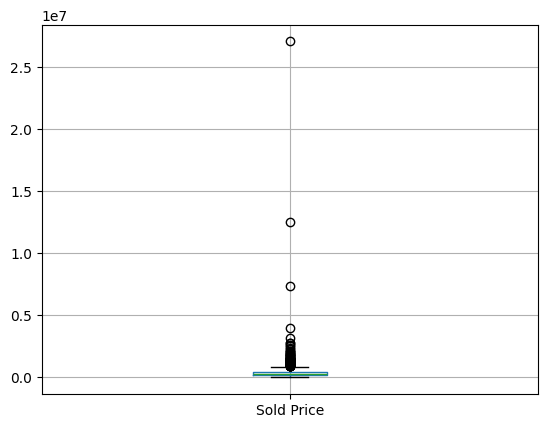

In [47]:
DroppedUnhelpfulColumns.boxplot(column=['Sold Price'])
plt.show()

In [62]:
# drop the outliers
ValuesToDrop = pd.concat([CheckingLowerPrices,CheckingHigherPrices]).index

AllPriceOutliersDropped = DroppedUnhelpfulColumns.drop(ValuesToDrop)

AllPriceOutliersDropped

,Tags,List Date,Year Built,Baths 3 Quarter,Sold Price,Baths Full,Baths Half,Lot Square Feet,Square Feet,Baths,...,Other Listing Status,Listing ID,Postal Code,State,Latitude,Longitude,City,StateCode,Matterport,Tour Link
0,"central_air, central_heat, community_outdoor_s...",2023-12-19T18:08:22.000000Z,1998.0,NaN,129900.0,2.0,NaN,11761.0,1478.0,2.0,...,sold,6.224759e+08,36117,Alabama,32.389075,-86.178412,Montgomery,AL,False,NaN
1,"city_view, hardwood_floors, two_or_more_storie...",2023-11-10T14:20:36.000000Z,1945.0,NaN,88500.0,2.0,NaN,6534.0,1389.0,2.0,...,off_market,2.961523e+09,36107,Alabama,32.382748,-86.273286,Montgomery,AL,False,NaN
2,"carport, central_air, central_heat, dishwasher...",2023-12-19T18:08:22.000000Z,1969.0,NaN,145000.0,2.0,NaN,17424.0,2058.0,2.0,...,off_market,6.197932e+08,36109,Alabama,32.380023,-86.221454,Montgomery,AL,False,NaN
3,"carport, central_air, city_view, community_out...",2023-07-05T16:47:40.000000Z,1955.0,NaN,65000.0,2.0,NaN,9712.0,1432.0,2.0,...,off_market,2.957379e+09,36107,Alabama,32.386844,-86.284387,Montgomery,AL,False,NaN
4,"city_view, single_story, big_yard, fenced_yard...",2023-10-29T17:55:28.000000Z,1984.0,NaN,169000.0,2.0,NaN,10890.0,1804.0,2.0,...,sold,2.960976e+09,36106,Alabama,32.351898,-86.232662,Montgomery,AL,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437,"central_air, forced_air, basement, two_or_more...",2023-04-05T19:28:04Z,1910.0,NaN,99000.0,1.0,NaN,4792.0,1214.0,1.0,...,off_market,2.954257e+09,25314,West Virginia,38.341576,-81.644994,Charleston,WV,False,NaN
1438,"basement, big_lot",2023-05-28T02:25:28Z,NaN,NaN,29700.0,1.0,NaN,7841.0,988.0,1.0,...,off_market,2.956178e+09,25387,West Virginia,38.377371,-81.661662,Charleston,WV,False,NaN
1439,"basement, big_lot",2023-01-24T18:27:46Z,NaN,NaN,162250.0,1.0,NaN,65340.0,1470.0,1.0,...,off_market,2.951732e+09,25314,West Virginia,38.338617,-81.659885,Charleston,WV,False,NaN
1440,rental_property,2023-03-24T12:27:42Z,NaN,NaN,63800.0,NaN,NaN,NaN,NaN,0.0,...,off_market,2.953862e+09,25302,West Virginia,38.363038,-81.644214,Charleston,WV,False,NaN


In [63]:
AllPriceOutliersDropped[['Baths 3 Quarter','Baths Full','Baths Half','Baths','Baths 1 Quarter','Garage','Beds']]

,Baths 3 Quarter,Baths Full,Baths Half,Baths,Baths 1 Quarter,Garage,Beds
0,NaN,2.0,NaN,2.0,NaN,2.0,3.0
1,NaN,2.0,NaN,2.0,NaN,1.0,4.0
2,NaN,2.0,NaN,2.0,NaN,NaN,3.0
3,NaN,2.0,NaN,2.0,NaN,NaN,3.0
4,NaN,2.0,NaN,2.0,NaN,NaN,3.0
...,...,...,...,...,...,...,...
1437,NaN,1.0,NaN,1.0,NaN,1.0,3.0
1438,NaN,1.0,NaN,1.0,NaN,NaN,3.0
1439,NaN,1.0,NaN,1.0,NaN,NaN,3.0
1440,NaN,NaN,NaN,0.0,NaN,NaN,0.0


In [65]:
# filling in null values that likely represent 0

AllPriceOutliersDropped.loc[AllPriceOutliersDropped['Baths 3 Quarter'].isnull() == True, 'Baths 3 Quarter'] = 0
AllPriceOutliersDropped.loc[AllPriceOutliersDropped['Baths Full'].isnull() == True, 'Baths Full'] = 0
AllPriceOutliersDropped.loc[AllPriceOutliersDropped['Baths Half'].isnull() == True, 'Baths Half'] = 0
AllPriceOutliersDropped.loc[AllPriceOutliersDropped['Baths'].isnull() == True, 'Baths'] = 0
AllPriceOutliersDropped.loc[AllPriceOutliersDropped['Baths 1 Quarter'].isnull() == True, 'Baths 1 Quarter'] = 0
AllPriceOutliersDropped.loc[AllPriceOutliersDropped['Garage'].isnull() == True, 'Garage'] = 0
AllPriceOutliersDropped.loc[AllPriceOutliersDropped['Beds'].isnull() == True, 'Beds'] = 0

# lowest amount of stories is 1, so any null values get filled to 1
AllPriceOutliersDropped.loc[AllPriceOutliersDropped['Stories'].isnull() == True, 'Stories'] = 1

In [66]:
AllPriceOutliersDropped[['Baths 3 Quarter','Baths Full','Baths Half','Baths','Baths 1 Quarter','Garage','Beds']]

,Baths 3 Quarter,Baths Full,Baths Half,Baths,Baths 1 Quarter,Garage,Beds
0,0.0,2.0,0.0,2.0,0.0,2.0,3.0
1,0.0,2.0,0.0,2.0,0.0,1.0,4.0
2,0.0,2.0,0.0,2.0,0.0,0.0,3.0
3,0.0,2.0,0.0,2.0,0.0,0.0,3.0
4,0.0,2.0,0.0,2.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...
1437,0.0,1.0,0.0,1.0,0.0,1.0,3.0
1438,0.0,1.0,0.0,1.0,0.0,0.0,3.0
1439,0.0,1.0,0.0,1.0,0.0,0.0,3.0
1440,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
AllPriceOutliersDropped['Square Feet'].isnull().value_counts()

Square Feet
False    1320
True      117
Name: count, dtype: int64

In [71]:
# get average of Square Feet in a home by State
AvgSqFtByState = AllPriceOutliersDropped.groupby('State')['Square Feet'].mean()

# get average of Lot Square Feet around a home by State
AvgLotSqFtByState = AllPriceOutliersDropped.groupby('State')['Lot Square Feet'].mean()

In [72]:
# filling in nulls

# filling nulls with the average Square Feet by the State that corresponds to the row
AllPriceOutliersDropped['Square Feet'] = AllPriceOutliersDropped['Square Feet'].fillna(AllPriceOutliersDropped['State'].map(AvgSqFtByState))

# filling nulls with the average Lot Square Feet by the State that corresponds to the row
AllPriceOutliersDropped['Lot Square Feet'] = AllPriceOutliersDropped['Lot Square Feet'].fillna(AllPriceOutliersDropped['State'].map(AvgLotSqFtByState))

In [73]:
AllPriceOutliersDropped['Square Feet'].isnull().value_counts()

Square Feet
False    1437
Name: count, dtype: int64

In [74]:
AllPriceOutliersDropped['Lot Square Feet'].isnull().value_counts()

Lot Square Feet
False    1434
True        3
Name: count, dtype: int64

In [75]:
# checking the still null Lot Square values
AllPriceOutliersDropped[AllPriceOutliersDropped['Lot Square Feet'].isnull()]

,Tags,List Date,Year Built,Baths 3 Quarter,Sold Price,Baths Full,Baths Half,Lot Square Feet,Square Feet,Baths,...,Other Listing Status,Listing ID,Postal Code,State,Latitude,Longitude,City,StateCode,Matterport,Tour Link
416,NaN,NaN,1929.0,0.0,880000.0,1.0,0.0,NaN,592.0,1.0,...,NaN,NaN,96816,Hawaii,21.287097,-157.810583,Honolulu,HI,False,NaN
417,NaN,NaN,1966.0,0.0,1048000.0,1.0,1.0,NaN,799.0,1.0,...,NaN,NaN,96815,Hawaii,21.277707,-157.810401,Honolulu,HI,False,NaN
418,NaN,NaN,1961.0,0.0,1100000.0,2.0,0.0,NaN,2944.0,2.0,...,NaN,NaN,96816,Hawaii,21.279435,-157.799782,Honolulu,HI,False,NaN


In [77]:
AllPriceOutliersDropped[AllPriceOutliersDropped['State'] == 'Hawaii']

,Tags,List Date,Year Built,Baths 3 Quarter,Sold Price,Baths Full,Baths Half,Lot Square Feet,Square Feet,Baths,...,Other Listing Status,Listing ID,Postal Code,State,Latitude,Longitude,City,StateCode,Matterport,Tour Link
416,NaN,NaN,1929.0,0.0,880000.0,1.0,0.0,NaN,592.0,1.0,...,NaN,NaN,96816,Hawaii,21.287097,-157.810583,Honolulu,HI,False,NaN
417,NaN,NaN,1966.0,0.0,1048000.0,1.0,1.0,NaN,799.0,1.0,...,NaN,NaN,96815,Hawaii,21.277707,-157.810401,Honolulu,HI,False,NaN
418,NaN,NaN,1961.0,0.0,1100000.0,2.0,0.0,NaN,2944.0,2.0,...,NaN,NaN,96816,Hawaii,21.279435,-157.799782,Honolulu,HI,False,NaN


In [78]:
# dropping Hawaii. there are very few values and none with Lot Square Feet
DroppingHawaiiValues = AllPriceOutliersDropped[AllPriceOutliersDropped['State'] == 'Hawaii'].index

ImputedSqFtValues = AllPriceOutliersDropped.drop(DroppingHawaiiValues)

ImputedSqFtValues

,Tags,List Date,Year Built,Baths 3 Quarter,Sold Price,Baths Full,Baths Half,Lot Square Feet,Square Feet,Baths,...,Other Listing Status,Listing ID,Postal Code,State,Latitude,Longitude,City,StateCode,Matterport,Tour Link
0,"central_air, central_heat, community_outdoor_s...",2023-12-19T18:08:22.000000Z,1998.0,0.0,129900.0,2.0,0.0,11761.000000,1478.0,2.0,...,sold,6.224759e+08,36117,Alabama,32.389075,-86.178412,Montgomery,AL,False,NaN
1,"city_view, hardwood_floors, two_or_more_storie...",2023-11-10T14:20:36.000000Z,1945.0,0.0,88500.0,2.0,0.0,6534.000000,1389.0,2.0,...,off_market,2.961523e+09,36107,Alabama,32.382748,-86.273286,Montgomery,AL,False,NaN
2,"carport, central_air, central_heat, dishwasher...",2023-12-19T18:08:22.000000Z,1969.0,0.0,145000.0,2.0,0.0,17424.000000,2058.0,2.0,...,off_market,6.197932e+08,36109,Alabama,32.380023,-86.221454,Montgomery,AL,False,NaN
3,"carport, central_air, city_view, community_out...",2023-07-05T16:47:40.000000Z,1955.0,0.0,65000.0,2.0,0.0,9712.000000,1432.0,2.0,...,off_market,2.957379e+09,36107,Alabama,32.386844,-86.284387,Montgomery,AL,False,NaN
4,"city_view, single_story, big_yard, fenced_yard...",2023-10-29T17:55:28.000000Z,1984.0,0.0,169000.0,2.0,0.0,10890.000000,1804.0,2.0,...,sold,2.960976e+09,36106,Alabama,32.351898,-86.232662,Montgomery,AL,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437,"central_air, forced_air, basement, two_or_more...",2023-04-05T19:28:04Z,1910.0,0.0,99000.0,1.0,0.0,4792.000000,1214.0,1.0,...,off_market,2.954257e+09,25314,West Virginia,38.341576,-81.644994,Charleston,WV,False,NaN
1438,"basement, big_lot",2023-05-28T02:25:28Z,NaN,0.0,29700.0,1.0,0.0,7841.000000,988.0,1.0,...,off_market,2.956178e+09,25387,West Virginia,38.377371,-81.661662,Charleston,WV,False,NaN
1439,"basement, big_lot",2023-01-24T18:27:46Z,NaN,0.0,162250.0,1.0,0.0,65340.000000,1470.0,1.0,...,off_market,2.951732e+09,25314,West Virginia,38.338617,-81.659885,Charleston,WV,False,NaN
1440,rental_property,2023-03-24T12:27:42Z,NaN,0.0,63800.0,0.0,0.0,81642.060606,1560.5,0.0,...,off_market,2.953862e+09,25302,West Virginia,38.363038,-81.644214,Charleston,WV,False,NaN


In [79]:
ImputedSqFtValues['House Type'].isnull().value_counts()

House Type
False    1431
True        3
Name: count, dtype: int64

In [80]:
ImputedSqFtValues['House Type'].value_counts()
# checking the types of values. will fill in with most common in State

House Type
single_family                  968
condos                         142
townhomes                      110
multi_family                   106
land                            63
mobile                          30
condo                            5
apartment                        4
other                            1
duplex_triplex                   1
condo_townhome_rowhome_coop      1
Name: count, dtype: int64

In [81]:
# getting most common House Type by state
ModeHouseTypeByState = ImputedSqFtValues.groupby('State')['House Type'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
ModeHouseTypeByState

State
Alabama           single_family
Arizona           single_family
Arkansas          single_family
California        single_family
Colorado          single_family
Connecticut        multi_family
Delaware          single_family
Florida           single_family
Georgia                  condos
Illinois                 mobile
Indiana           single_family
Iowa              single_family
Kentucky          single_family
Maryland          single_family
Massachusetts            condos
Michigan          single_family
Minnesota         single_family
Nebraska          single_family
Nevada            single_family
New Hampshire     single_family
New Jersey            townhomes
New York          single_family
North Carolina    single_family
Ohio              single_family
Oklahoma          single_family
Oregon            single_family
Pennsylvania      single_family
Rhode Island      single_family
South Carolina    single_family
Tennessee         single_family
Virginia          single_family
Wa

In [82]:
# filling nulls of House Type by the most occuring value per state
ImputedSqFtValues['House Type'] = ImputedSqFtValues['House Type'].fillna(ImputedSqFtValues['State'].map(ModeHouseTypeByState))

ImputedSqFtValues['House Type'].isnull().value_counts()

House Type
False    1434
Name: count, dtype: int64

In [83]:
ImputedSqFtValues['Company Name'].isnull().value_counts()

Company Name
False    1403
True       31
Name: count, dtype: int64

In [84]:
# getting most common Company Name by state
ModeCompanyNameByState = ImputedSqFtValues.groupby('State')['Company Name'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
ModeCompanyNameByState

State
Alabama                               Capital Rlty Grp River Region
Arizona                                                   HomeSmart
Arkansas                           Keller Williams Realty Lr Branch
California                            eXp Realty of California Inc.
Colorado                                             eXp Realty LLC
Connecticut                                  Coldwell Banker Realty
Delaware                                 Kw Realty Central-Delaware
Florida                              Keller Williams Town & Country
Georgia           Atlanta Fine Homes Sotheby's International Realty
Illinois                                                 Northbrook
Indiana                                       List With Freedom.com
Iowa                                     Keller Williams Realty Gdm
Kentucky                            CENTURY 21 Simpson & Associates
Maryland                           Long & Foster Annapolis Eastport
Massachusetts                             

In [85]:
# filling nulls of House Type by the most occuring value per state
ImputedSqFtValues['Company Name'] = ImputedSqFtValues['Company Name'].fillna(ImputedSqFtValues['State'].map(ModeCompanyNameByState))

ImputedSqFtValues['Company Name'].isnull().value_counts()

Company Name
False    1434
Name: count, dtype: int64

In [86]:
ImputedSqFtValues['Photo Label'].isnull().value_counts()

Photo Label
False    1363
True       71
Name: count, dtype: int64

In [12]:
ImputedSqFtValues = pd.read_csv('../data/SavePoints/WorkingOnPhotosInfo.csv')

In [17]:
ImputedSqFtValues['Photo Probability'].plot(kind='hist')
plt.savefig('../images/PhotoProbability')

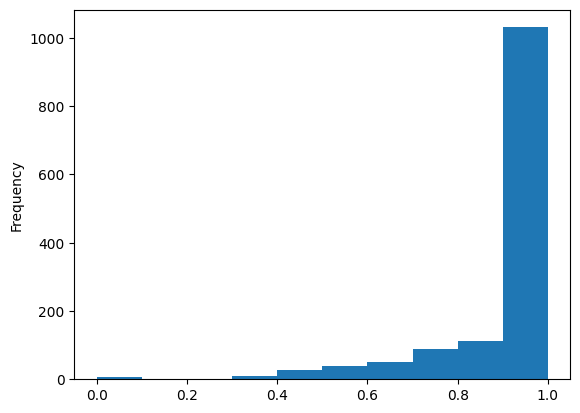

In [16]:
ImputedSqFtValues['Photo Probability'].plot(kind='hist')
plt.show()
# not certain what these represent, but the distribution is also mostly at 1 

In [96]:
# changing the value to True if there is a link (not null) and False if there is not a value
ImputedSqFtValues['Photo Link'] = ImputedSqFtValues['Photo Link'].apply(lambda x: True if pd.notnull(x) and x != '' else False)
ImputedSqFtValues['Photo Link']

0       False
1        True
2       False
3        True
4        True
        ...  
1437     True
1438     True
1439     True
1440     True
1441     True
Name: Photo Link, Length: 1434, dtype: bool

In [9]:
FinalDropsList = ['List Date' # we want to be able to predict selling prices for houses not yet listed. 
, 'Photo Label' # could be useful to see what features of a house draw people in. not including because the largest label group is 'unknown'
, 'Photo Probability' # hard to say what this represents
, 'Tags' # removed for MVP. 
, 'Year Built' # missing values, dropping for MVP. could impute based on state average.
, 'Sub Type' # missing values, dropping for MVP. could impute based on state mode.
, 'Brand Category' # missing values, dropping for MVP. could impute based on state mode.
, 'Other Listing Status' # missing values, dropping for MVP. could impute based on state mode.
, 'Listing ID' # doesn't appear to actually affect house price
, 'Latitude' # missing values, dropping for MVP. could impute based on state average.
, 'Longitude' # missing values, dropping for MVP. could impute based on state average.
, 'City' # missing values, dropping for MVP. could use latitude and longitude values to find.
, 'StateCode' # Already have state
, 'Tour Link' # missing values, dropping for MVP. very similar to 'Matterport' (3D virtual tour) but includes other virtual tours like youtube videos. could change value to True if there is a link and False if there is no link.
]

In [10]:
ReadyForDummies = ImputedSqFtValues.drop(columns=FinalDropsList)
ReadyForDummies.columns

Index(['Baths 3 Quarter', 'Sold Price', 'Baths Full', 'Baths Half',
       'Lot Square Feet', 'Square Feet', 'Baths', 'Baths 1 Quarter', 'Garage',
       'Stories', 'Beds', 'House Type', 'Company Name', 'Branding Type',
       'Show Contact an Agent', 'Photo Link', 'Postal Code', 'State',
       'Matterport'],
      dtype='object')

### Dealing with Tags

Consider the fact that with tags, there are a lot of categorical variables.
- How many columns would we have if we OHE tags, city and state?
- Perhaps we can get rid of tags that have a low frequency.

In [ ]:
# OHE categorical variables/ tags here
# tags will have to be done manually

In [11]:
# creating dummy variables for the categorical columns
Categories = ReadyForDummies.dtypes[ReadyForDummies.dtypes == 'object'].index.tolist()
ReadyForSplitDummy = pd.get_dummies(ReadyForDummies[Categories])
ReadyForSplitDummy

,House Type_apartment,House Type_condo,House Type_condo_townhome_rowhome_coop,House Type_condos,House Type_duplex_triplex,House Type_land,House Type_mobile,House Type_multi_family,House Type_other,House Type_single_family,...,State_Oklahoma,State_Oregon,State_Pennsylvania,State_Rhode Island,State_South Carolina,State_Tennessee,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin
0,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1430,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1431,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1432,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False


In [13]:
# removing the original Categories
CategoriesDropped = ReadyForDummies.drop(columns=Categories)

# concatenating in the dummies
ReadyForSplit = pd.concat([CategoriesDropped, ReadyForSplitDummy], axis = 1)
ReadyForSplit

,Baths 3 Quarter,Sold Price,Baths Full,Baths Half,Lot Square Feet,Square Feet,Baths,Baths 1 Quarter,Garage,Stories,...,State_Oklahoma,State_Oregon,State_Pennsylvania,State_Rhode Island,State_South Carolina,State_Tennessee,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin
0,0.0,129900.0,2.0,0.0,11761.000000,1478.0,2.0,0.0,2.0,1.0,...,False,False,False,False,False,False,False,False,False,False
1,0.0,88500.0,2.0,0.0,6534.000000,1389.0,2.0,0.0,1.0,2.0,...,False,False,False,False,False,False,False,False,False,False
2,0.0,145000.0,2.0,0.0,17424.000000,2058.0,2.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False
3,0.0,65000.0,2.0,0.0,9712.000000,1432.0,2.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False
4,0.0,169000.0,2.0,0.0,10890.000000,1804.0,2.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,0.0,99000.0,1.0,0.0,4792.000000,1214.0,1.0,0.0,1.0,2.0,...,False,False,False,False,False,False,False,False,True,False
1430,0.0,29700.0,1.0,0.0,7841.000000,988.0,1.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,False,True,False
1431,0.0,162250.0,1.0,0.0,65340.000000,1470.0,1.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,False,True,False
1432,0.0,63800.0,0.0,0.0,81642.060606,1560.5,0.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,False,True,False


In [2]:
# saving this
ReadyForSplitPath = '../data/SavePoints/ReadyForSplit.csv'

In [15]:
ReadyForSplit.to_csv(ReadyForSplitPath, index= False)

### Dealing with Cities

- Sales will vary drastically between cities and states.  Is there a way to keep information about which city it is without OHE?
- Could we label encode or ordinal encode?  Yes, but this may have undesirable effects, giving nominal data ordinal values.
- What we can do is use our training data to encode the mean sale price by city as a feature (a.k.a. Target Encoding)
    - We can do this as long as we ONLY use the training data - we're using the available data to give us a 'starting guess' of the price for each city, without needing to encode city explicitly
- If you replace cities or states with numerical values (like the mean price), make sure that the data is split so that we don't leak data into the training selection. This is a great time to train test split. Compute on the training data, and join these values to the test data
- Note that you *may* have cities in the test set that are not in the training set. You don't want these to be NA, so maybe you can fill them with the overall mean

In [3]:
ReadyForSplit = pd.read_csv(ReadyForSplitPath)

In [ ]:
# perform train test split here
# do something with state and city

In [4]:
y = ReadyForSplit['Sold Price']
X = ReadyForSplit.drop(columns='Sold Price')

In [5]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

## Extra Data - STRETCH

> This doesn't need to be part of your Minimum Viable Product (MVP). We recommend you write a functional, basic pipeline first, then circle back and join new data if you have time

> If you do this, try to write your downstream steps in a way it will still work on a dataframe with different features!

- You're not limited to just using the data provided to you. Think/ do some research about other features that might be useful to predict housing prices. 
- Can you import and join this data? Make sure you do any necessary preprocessing and make sure it is joined correctly.
- Example suggestion: could mortgage interest rates in the year of the listing affect the price? 

In [ ]:
# import, join and preprocess new data here

## EDA/ Visualization

Remember all of the EDA that you've been learning about?  Now is a perfect time for it!
- Look at distributions of numerical variables to see the shape of the data and detect outliers.    
    - Consider transforming very skewed variables
- Scatterplots of a numerical variable and the target go a long way to show correlations.
- A heatmap will help detect highly correlated features, and we don't want these.
    - You may have too many features to do this, in which case you can simply compute the most correlated feature-pairs and list them
- Is there any overlap in any of the features? (redundant information, like number of this or that room...)

In [ ]:
# perform EDA here

## Scaling and Finishing Up

Now is a great time to scale the data and save it once it's preprocessed.
- You can save it in your data folder, but you may want to make a new `processed/` subfolder to keep it organized

In [6]:
# initializing separate scalers for X and y
X_Scaler = StandardScaler()
y_scaler = StandardScaler()

In [7]:
# fit scaler on training data
X_train_scaled  = X_Scaler.fit_transform(X_train.values)

# scaling target value because of varied house prices
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)) # reshaping y because scalers expect a 2d array

# transform testing data using the fitted scaler
X_test_scaled  = X_Scaler.transform(X_test.values)

y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

In [34]:
# Save Data Using Pickle

In [8]:
SplitAndScaledPath = '../data/processed/SplitAndScaled.pkl'

with open(SplitAndScaledPath, 'wb') as f:
    pickle.dump((X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled), f)